In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# index_col = 0 - jeżeli jest kolumna do stosowania jako etykiety wierszy ramki danych. 
# index_col = None - jeżeli brak takiej kolumny
# na_values = ['NA'] - tam gdzie Na będzie NaN np. jakbyśmy dali na_values=['female'] - wszędzie za female będzie NaN
titanic_df = pd.read_excel('titanic3.xls', index_col = None, na_values=['Na'])

In [3]:
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
titanic_df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
titanic_df.drop(['ticket','cabin','boat','body'], axis=1).head() # axis = 1 - kolumny / domyślnie axis = 0 - index

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"


In [6]:
titanic_df.isnull().sum() # suma brakujących danych dla poszczególnych kolumn

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [7]:
# pd.value_counts - zlicza wystąpienia unikalnych wartości i wypisuje w kolejności malejącej
pd.value_counts(titanic_df['survived'])
# w naszym przypadku zliczane są wystąpienia 0 i 1 w kolumnie survived z ramki danych titanic_df

0    809
1    500
Name: survived, dtype: int64

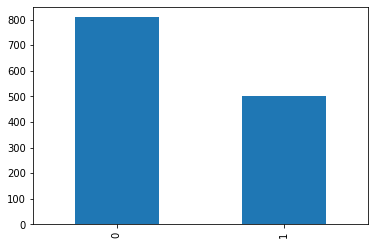

In [8]:
# możemy w łatwy sposób przedstawić to graficznie za pomocą plot.bar()
pd.value_counts(titanic_df['survived']).plot.bar()

In [9]:
# ile procent osób przeżyło - 38% 
titanic_df['survived'].mean()

0.3819709702062643

In [10]:
# groupby.().mean() - oblicza średnią grup, wyłączając brakujące wartości 
titanic_df.groupby(['sex']).mean()
# czyli grupujemy po kobietach i mężczyznach i obliczamy średnie dla poszczególnych kolumn z tym podziałem
# możemy tu wyczytać takie dane jak np. że przeżyło 72% kobiet(ze wszystkich kobiet na pokładzie), 
# a mężczyzny 19% (ze wszystkich mężczyzn na pokładzie)

,pclass,survived,age,sibsp,parch,fare,body
sex,,,,,,,
female,2.154506,0.727468,28.687071,0.652361,0.633047,46.198097,166.62500
male,2.372479,0.190985,30.585233,0.413998,0.247924,26.154601,160.39823


male      843
female    466
Name: sex, dtype: int64


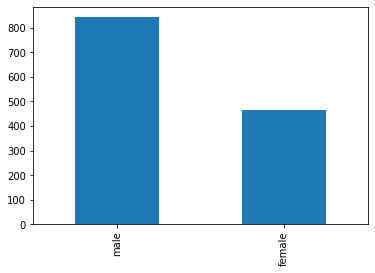

In [11]:
# możemy to sprawdzić, czy aby na pewno takie wyniki powinny wyjść
print(pd.value_counts(titanic_df['sex']))
# mamy 843 mężczyzn i 466 kobiet
pd.value_counts(titanic_df['sex']).plot.bar()

In [12]:
# zapisz do "ladies_who_survived" nową ramkę danych ale tylko te rekordy, gdzie płeć to kobieta, która przeżyła
ladies_who_survived  = titanic_df[(titanic_df['sex'] == 'female') & (titanic_df['survived'] == 1)]
how_many_ladies_survived = ladies_who_survived['survived'].count() # zlicz ile ich jest po kolumnie 'survived'

all_person = pd.value_counts(titanic_df['sex'])

print(f"""Przeżyło {how_many_ladies_survived} kobiet z {all_person['female']} wszystkich na statku.
Jest to {how_many_ladies_survived/all_person['female']}%""")
# 339 kobiet przeżyło z 466 --> 72% - czyli wszystko się zgadza 

Przeżyło 339 kobiet z 466 wszystkich na statku.
Jest to 0.7274678111587983%


In [13]:
# można też grupować po 2 cechach na raz np. po płci, ale dodatkowo po klasie w jakiej podróżowali
titanic_df.groupby(['sex', 'pclass']).mean()
# tu natomiast widzimy że kobieta z 1 klasy miała 96% szans na przeżycie natomiast mężczyzni z 2 i 3 klasy tylko 15% 

survived        age     sibsp     parch        fare        body
sex    pclass                                                                 
female 1       0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       2       0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       3       0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
male   1       0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
       2       0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
       3       0.152130  25.962273  0.470588  0.255578   12.415462  151.854167

In [14]:
# można też grupować dane, które zostały uszczuplone o warunek
# np. grupuj dane, ale tylko te gdzie wiek nie przekracza 18 lat
titanic_df[titanic_df['age']<18].groupby(['sex','pclass']).mean()
# widzimy tu że średnia wieku znacząco spadła, ponieważ wyznaczamy średnie z wieku osób poniżej 18 roku życia
# np. przeżycie dziewczynek z 1 klasy wynosi 87%, z klasy drugiej przeżyły wszystkie, 
# a chłopców w klasie 3 przetrwało zaledwie 23% 

survived        age     sibsp     parch        fare   body
sex    pclass                                                            
female 1       0.875000  14.125000  0.500000  0.875000  104.083337    NaN
       2       1.000000   8.273150  0.666667  1.166667   27.998844    NaN
       3       0.543478   8.416667  1.456522  1.043478   18.284148  328.0
male   1       0.857143   9.845243  0.571429  1.714286  129.752371    NaN
       2       0.733333   6.222220  0.600000  0.933333   31.750280    NaN
       3       0.233333   9.838888  1.966667  1.016667   21.677570   65.5